In [1]:
#pip install pycountry

# Énoncé du problème

L'équipe chargée des revenus d'un groupe hôtelier a récemment été confrontée à un problème important : une augmentation des annulations. Cette tendance a non seulement perturbé le fonctionnement efficace des hôtels, mais a également entraîné d'importantes pertes de revenus. L’équipe avait besoin d’informations et de solutions : quels étaient les facteurs à l’origine de ces annulations ? Y a-t-il eu des modèles ou des tendances identifiables ? Afin de répondre à ces questions cruciales, l’analyse des données est apparue comme l’outil le plus puissant.

In [2]:
import pandas as pd
import numpy as np
# Charger les données des fichiers Excel pour 2018, 2019 et 2020
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')
data_2020 = pd.read_csv('2020.csv')

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# Supprimez les espaces de début des noms de colonnes
data_2020.columns = data_2020.columns.str.strip()
# Concaténer les données des trois années en un seul DataFrame
hotel_data = pd.concat([data_2018, data_2019, data_2020])
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2018
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2018
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,6/23/2018
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,5/11/2018
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,5/29/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40682,City Hotel,1,1,2020,February,5,1,0,0,1,...,No Deposit,NaN,153.0,0,Transient,0.0,0,1,No-Show,2/1/2020
40683,City Hotel,1,31,2020,July,29,16,2,0,1,...,No Deposit,NaN,NaN,0,Transient,135.0,0,2,No-Show,7/16/2020
40684,City Hotel,1,25,2020,May,18,6,2,1,1,...,No Deposit,NaN,450.0,0,Transient,125.0,0,0,No-Show,5/6/2020
40685,City Hotel,1,6,2020,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,7/17/2020


In [4]:
market_segment_data = pd.read_csv('market_segment.csv')
meal_cost_data = pd.read_csv('meal_cost.csv')

In [5]:
meal_cost_data['Cost'] = meal_cost_data['Cost'].astype(str).str.strip()
# Supprimez les espaces blancs et les convertir dans le même type de données
hotel_data['market_segment'] = hotel_data['market_segment'].str.strip()
meal_cost_data['meal'] = meal_cost_data['meal'].str.strip()
meal_cost_data['Cost'] = meal_cost_data['Cost'].str.strip()

In [6]:
# Assurez-vous que la colonne 'Cost' est numérique (en supposant qu'elle doit être numérique)
meal_cost_data['Cost'] = pd.to_numeric(meal_cost_data['Cost'], errors='coerce')
meal_cost_data

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [7]:
# Fusionnez des DataFrames
hotel_data = pd.merge(hotel_data, market_segment_data, on='market_segment', how='left')
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2018,0.30
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2018,0.30
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,240.0,NaN,0,Transient,123.0,0,0,Canceled,6/23/2018,0.30
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,240.0,NaN,0,Transient,107.0,0,2,Canceled,5/11/2018,0.30
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,NaN,NaN,0,Transient,108.3,0,2,Canceled,5/29/2018,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141942,City Hotel,1,1,2020,February,5,1,0,0,1,...,NaN,153.0,0,Transient,0.0,0,1,No-Show,2/1/2020,0.20
141943,City Hotel,1,31,2020,July,29,16,2,0,1,...,NaN,NaN,0,Transient,135.0,0,2,No-Show,7/16/2020,0.10
141944,City Hotel,1,25,2020,May,18,6,2,1,1,...,NaN,450.0,0,Transient,125.0,0,0,No-Show,5/6/2020,0.15
141945,City Hotel,1,6,2020,July,29,17,1,0,1,...,NaN,238.0,0,Transient,65.0,0,0,No-Show,7/17/2020,0.15


In [8]:
hotel_data = pd.merge(hotel_data, meal_cost_data, on='meal', how='left')
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,NaN,0,Transient,82.0,0,1,Canceled,5/6/2018,0.30,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,NaN,0,Transient,105.5,0,0,Canceled,4/22/2018,0.30,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,NaN,0,Transient,123.0,0,0,Canceled,6/23/2018,0.30,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,NaN,0,Transient,107.0,0,2,Canceled,5/11/2018,0.30,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,NaN,0,Transient,108.3,0,2,Canceled,5/29/2018,0.10,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141942,City Hotel,1,1,2020,February,5,1,0,0,1,...,153.0,0,Transient,0.0,0,1,No-Show,2/1/2020,0.20,12.99
141943,City Hotel,1,31,2020,July,29,16,2,0,1,...,NaN,0,Transient,135.0,0,2,No-Show,7/16/2020,0.10,12.99
141944,City Hotel,1,25,2020,May,18,6,2,1,1,...,450.0,0,Transient,125.0,0,0,No-Show,5/6/2020,0.15,12.99
141945,City Hotel,1,6,2020,July,29,17,1,0,1,...,238.0,0,Transient,65.0,0,0,No-Show,7/17/2020,0.15,12.99


# Gestion des écarts dans les données :

In [9]:
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])
discrepancies = hotel_data[hotel_data['reservation_status_date'].dt.year != hotel_data['arrival_date_year']]

In [10]:
expected_years = [2018, 2019, 2020]
# Filtrer les lignes présentant des écarts anormaux et conserver uniquement celles avec les années attendues
hotel_data = hotel_data[hotel_data['reservation_status_date'].dt.year.isin(expected_years)]

In [11]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06,0.30,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22,0.30,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23,0.30,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11,0.30,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29,0.10,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141942,City Hotel,1,1,2020,February,5,1,0,0,1,...,153.0,0,Transient,0.0,0,1,No-Show,2020-02-01,0.20,12.99
141943,City Hotel,1,31,2020,July,29,16,2,0,1,...,NaN,0,Transient,135.0,0,2,No-Show,2020-07-16,0.10,12.99
141944,City Hotel,1,25,2020,May,18,6,2,1,1,...,450.0,0,Transient,125.0,0,0,No-Show,2020-05-06,0.15,12.99
141945,City Hotel,1,6,2020,July,29,17,1,0,1,...,238.0,0,Transient,65.0,0,0,No-Show,2020-07-17,0.15,12.99


# Gestion des valeurs manquantes :

In [12]:
for i in hotel_data.columns:
  if hotel_data[i].isna().sum() != 0:
    print('valeurs nulles dans', i, 'column :', hotel_data[i].isna().sum())

valeurs nulles dans children column : 8
valeurs nulles dans country column : 625
valeurs nulles dans agent column : 19555
valeurs nulles dans company column : 133460


In [13]:
hotel_data = hotel_data.dropna(subset=['children'])
mode_country = hotel_data['country'].mode()[0]
hotel_data['country'].fillna(mode_country, inplace=True)
hotel_data = hotel_data.drop(columns=['company'])
hotel_data['agent'].fillna(9, inplace=True)

<ipython-input-13-21457b6adf8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_data['country'].fillna(mode_country, inplace=True)


# L'analyse exploratoire des données

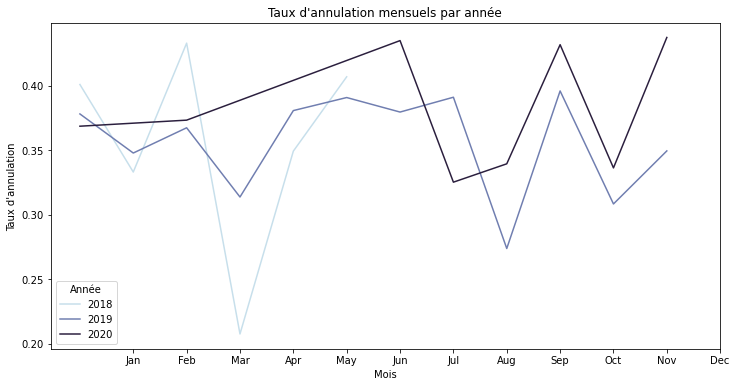

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Regroupez les données par année et par mois et calculez les taux d'annulation mensuels
monthly_cancelation_rates = hotel_data.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index()

# Trier les données par année et par mois pour un tracé correct
monthly_cancelation_rates = monthly_cancelation_rates.sort_values(by=['arrival_date_year', 'arrival_date_month'])
# Créer un tracé de série chronologique pour chaque année
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cancelation_rates, x='arrival_date_month', y='is_canceled', hue='arrival_date_year', palette='ch:s=.25,rot=-.25')
plt.title("Taux d'annulation mensuels par année")
plt.xlabel('Mois')
plt.ylabel("Taux d'annulation")
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Année')
plt.show()

Juin, Septembre et Novembre affichent les taux d'annulation les plus élevés. Par la suite, on constate une baisse des annulations dans les mois suivants. Cette tendance saisonnière suggère que des facteurs externes, tels que les projets de vacances ou les conditions météorologiques, pourraient influencer les annulations de réservation.
On peut voir aussi l'année 2020 est l'année ou le taux d'annulation est le plus élevé.

# Délai moyen pour chaque statut de réservation :

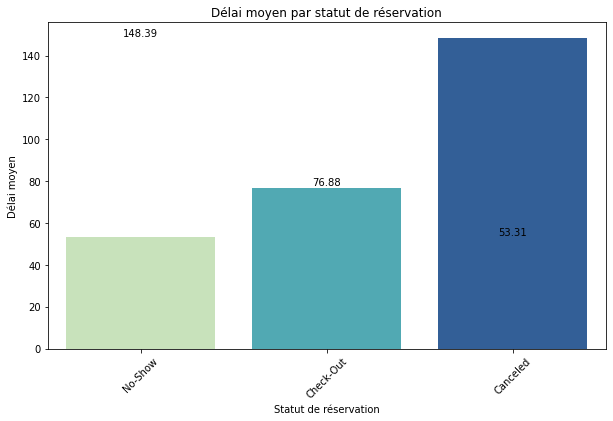

In [15]:
# Regroupez les données par statut de réservation et calculez le délai moyen
reservation_lead_time = hotel_data.groupby('reservation_status')['lead_time'].mean().reset_index()

# Triez les données pour tracer
reservation_lead_time = reservation_lead_time.sort_values(by='lead_time')

# Créer un tracé à barres avec des étiquettes
plt.figure(figsize=(10, 6))
sns.barplot(data=reservation_lead_time, x='reservation_status', y='lead_time', palette='YlGnBu')
plt.title("Délai moyen par statut de réservation")
plt.xlabel('Statut de réservation')
plt.ylabel('Délai moyen')

# Ajoutez des étiquettes de données aux barres 
for index, row in reservation_lead_time.iterrows():
    plt.text(index, row['lead_time'], f'{row["lead_time"]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

Le délai moyen pour les réservations annulées est d’environ 148 jours, tandis que le délai moyen pour les réservations « No-Show » est d’environ 51 jours et le délai moyen pour les réservations « Check-Out » est d’environ 76 jours. Nous pouvons comprendre qu'il y a plus de chances d'annulations à mesure que le délai (c'est-à-dire le temps entre la réservation et la date d'enregistrement) augmente par rapport au graphique ci-dessus. Cela peut être le résultat d'événements imprévus dans la vie des visiteurs, les obligeant à faire passer d'autres obligations avant leur séjour à l'hôtel.

# Taux d'annulation par segment de marché :

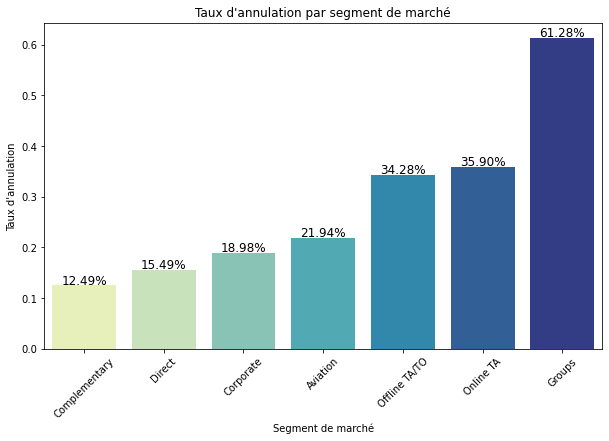

In [16]:
# Regroupez les données par segment de marché et calculez le taux d'annulation
market_segment_cancellation_rate = hotel_data.groupby('market_segment')['is_canceled'].mean().reset_index()

# Triez les données pour tracer
market_segment_cancellation_rate = market_segment_cancellation_rate.sort_values(by='is_canceled')

# Créez un graphique à barres pour les taux d'annulation des segments de marché avec la palette de couleurs 'YlGnBu'
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=market_segment_cancellation_rate, x='market_segment', y='is_canceled', palette='YlGnBu')

# Ajouter des étiquettes de données au graphique 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Taux d'annulation par segment de marché")
plt.xlabel('Segment de marché')
plt.ylabel("Taux d'annulation")
plt.xticks(rotation=45)
plt.show()

Parmi les différents segments de marché, il est frappant de constater que les réservations de groupe et les agences de voyages en ligne et affichent les taux d'annulation les plus élevés. En revanche, les réservations complémentaires affichent le taux d'annulation le plus bas, ce qui est normal car elles sont généralement gratuites. Cela met en évidence l’influence du canal de réservation sur les taux d’annulation, les options plus flexibles entraînant des annulations moins importantes.

# Taux d'annulation par canal de distribution :

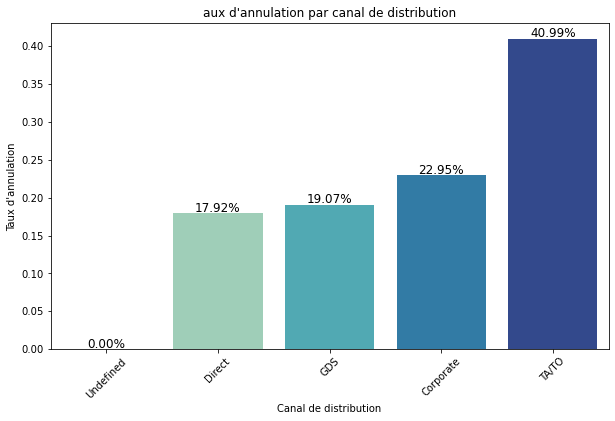

In [17]:
# Regroupez les données par canal de distribution et calculez le taux d'annulation
distribution_channel_cancellation_rate = hotel_data.groupby('distribution_channel')['is_canceled'].mean().reset_index()

# Triez les données pour tracer
distribution_channel_cancellation_rate = distribution_channel_cancellation_rate.sort_values(by='is_canceled')

# Créer un graphique à barres pour les taux d'annulation des canaux de distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=distribution_channel_cancellation_rate, x='distribution_channel', y='is_canceled', palette='YlGnBu')

# Ajouter des étiquettes de données au graphique 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("aux d'annulation par canal de distribution")
plt.xlabel("Canal de distribution")
plt.ylabel("Taux d'annulation")
plt.xticks(rotation=45)
plt.show()

Le graphique à barres ci-dessus révèle une tendance notable des taux d'annulation sur les différents canaux de distribution. Les agences de voyages en ligne [TA/TO] affichent le taux d'annulation le plus élevé (41 %), suivies de près par les réservations d’entreprises (Corporate) [23 %]. À l’opposé, les  les ventes direct [Direct] affichent le taux d’annulation le plus bas, à seulement 18 %. Cela souligne l’impact significatif du canal de distribution sur les taux d’annulation, des options plus flexibles conduisant systématiquement à des pourcentages d’annulation plus faibles.

# Vérification des clients qui font des demandes particulières plus ou moins susceptibles d'annuler :

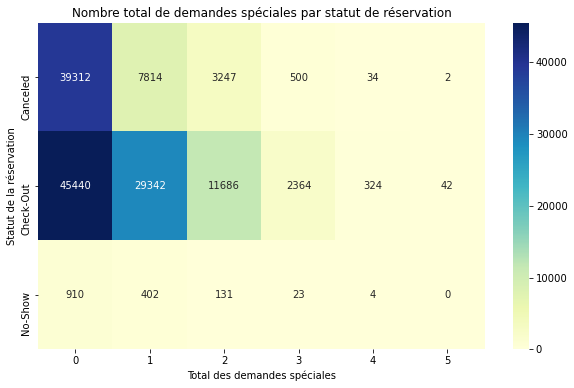

In [18]:
# Créez un tableau croisé dynamique avec 'reservation_status' et 'total_of_special_requests' comme indices
pivot_table = hotel_data.pivot_table(index='reservation_status', columns='total_of_special_requests', aggfunc='size', fill_value=0)

# Créez une heatmap en utilisant une couleur schéma
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Nombre total de demandes spéciales par statut de réservation")
plt.xlabel("Total des demandes spéciales")
plt.ylabel("Statut de la réservation")
plt.show()

En analysant si les demandes spéciales ont un impact sur les annulations, il apparaît que les clients qui font des demandes spéciales ont tendance à terminer leur séjour (« Check-Out »). Il est intéressant de noter que le taux d'annulation le plus élevé est observé parmi les réservations sans demandes particulières, similaires aux réservations « Check-Out ». Cela indique que le fait d'avoir des demandes spéciales n'affecte pas de manière significative le comportement d'annulation.

# Le client qui a besoin d'un parking est plus susceptible d'annuler 

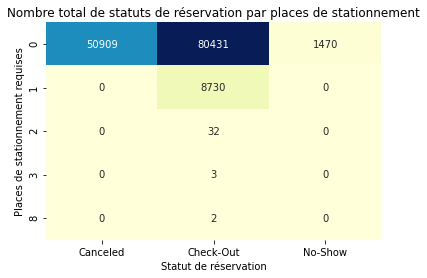

In [19]:
# Assuming 'hotel_data' is your DataFrame
pivot_table = hotel_data.pivot_table(index='required_car_parking_spaces', columns='reservation_status', values='adr', aggfunc='count', fill_value=0)

# Create a heatmap with a color scheme
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

plt.title("Nombre total de statuts de réservation par places de stationnement")
plt.xlabel("Statut de réservation")
plt.ylabel('Places de stationnement requises')

plt.show()


Le besoin de places de stationnement semble avoir un impact minime sur les annulations, car les clients qui ne demandent pas de place de parking affichent toujours des taux d'annulation variés. Cela suggère que la disponibilité du parking n'influence pas considérablement les annulations de réservation.

# Analyser si certains types de clients sont plus sujets aux annulations.

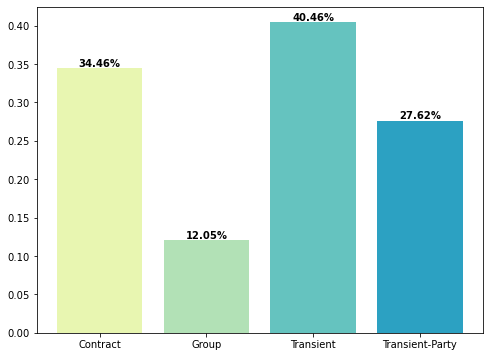

In [20]:
import matplotlib.pyplot as plt

# Regroupez les données par type de client et calculez les taux d'annulation
customer_type_cancellation = hotel_data.groupby('customer_type')['is_canceled'].mean().reset_index()

# Créez un graphique à barres avec la palette de couleurs 'YlGnBu' et les étiquettes de données
plt.figure(figsize=(8, 6))
bars = plt.bar(customer_type_cancellation['customer_type'], customer_type_cancellation['is_canceled'], color=sns.color_palette('YlGnBu'))

# Ajouter des étiquettes de données aux barres 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom', fontsize=10, fontweight='bold')


# Afficher le tracé
plt.show()


Une étude menée auprès de différents groupes de consommateurs montre que les réservations pour les voyageurs de passage [Transient] avaient un taux d'annulation de 28 %, tandis que les réservations pour les voyageurs de passage [Transient Party] avaient un taux d'annulation de 40 %. Ces résultats impliquent que certaines catégories de consommateurs, comme les visiteurs de courte durée, peuvent être plus sensibles aux causes d'annulation.



# Vérifier si les clients sont plus susceptibles d'annuler s'ils n'obtiennent pas le type de chambre qu'ils ont réservé :

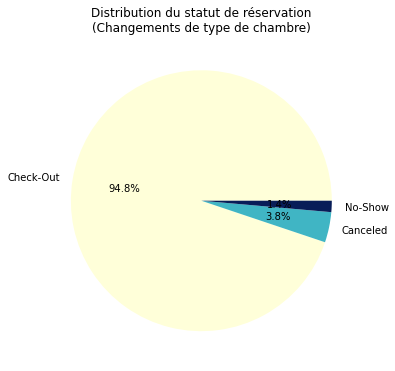

In [21]:
import matplotlib.pyplot as plt

# Filtrer les lignes où 'reserved_room_type' et 'assigned_room_type' ne sont pas similaires
room_type_changes = hotel_data[hotel_data['reserved_room_type'] != hotel_data['assigned_room_type']]

# Compter les occurrences de chaque 'reservation_status' lorsque 'reserved_room_type' et 'assigned_room_type' sont pas similaire
reservation_status_counts = room_type_changes['reservation_status'].value_counts(normalize=True)

# Définir la palette de couleurs 'YlGnBu'
colors = plt.cm.YlGnBu(np.linspace(0, 1, len(reservation_status_counts)))

# Créer un diagramme circulaire avec palette de couleurs 'YlGnBu'
plt.figure(figsize=(8, 6))
plt.pie(reservation_status_counts, labels=reservation_status_counts.index, autopct=lambda p: f'{p:.1f}%', colors=colors)
plt.title("Distribution du statut de réservation\n(Changements de type de chambre)")
plt.show()


Lorsqu'on cherche à savoir si les clients sont plus susceptibles d'annuler s'ils n'obtiennent pas le type de chambre qu'ils ont réservé, une tendance remarquable se dégage. Les clients qui n'ont pas reçu le type de chambre qu'ils avaient initialement réservé sont tout de même très susceptibles de terminer leur séjour (environ 95 % de « départ »). Cela implique que les écarts dans le type de chambre ont un impact limité sur les annulations.



# Vérifier si les modifications de réservation ont un impact sur l'annulation :

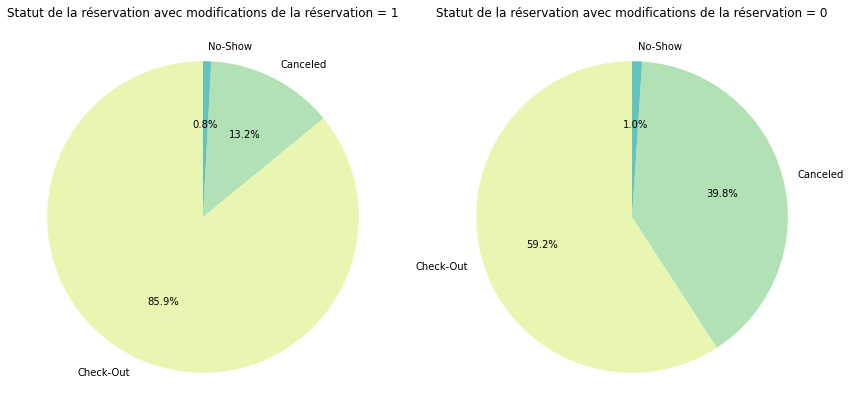

In [22]:
import matplotlib.pyplot as plt

# Filtrer les lignes où 'booking_changes' est 1 ou 0
booking_changes_1 = hotel_data[hotel_data['booking_changes'] == 1]
booking_changes_0 = hotel_data[hotel_data['booking_changes'] == 0]

# Calculer le pourcentage total pour chaque 'reservation_status' dans chaque groupe
total_1 = len(booking_changes_1)
total_0 = len(booking_changes_0)

reservation_status_counts_1 = booking_changes_1['reservation_status'].value_counts() / total_1 * 100
reservation_status_counts_0 = booking_changes_0['reservation_status'].value_counts() / total_0 * 100

# Créer deux diagrammes circulaires
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Diagramme circulaire pour 'booking_changes = 1'
ax1.pie(reservation_status_counts_1, labels=reservation_status_counts_1.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlGnBu'))
ax1.set_title('Statut de la réservation avec modifications de la réservation = 1')

# Diagramme circulaire pour 'booking_changes = 0'
ax2.pie(reservation_status_counts_0, labels=reservation_status_counts_0.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlGnBu'))
ax2.set_title('Statut de la réservation avec modifications de la réservation = 0')

plt.tight_layout()
plt.show()


L'analyse des modifications de réservation indique qu'il y a un pourcentage réduit d'annulations (13,2%) lorsque les clients modifient leurs réservations. A l’inverse, lorsqu’aucun changement n’est effectué, les annulations surviennent à un taux plus élevé (39,8 %). Cela implique que la flexibilité de modifier les réservations peut réduire les annulations, car les clients peuvent adapter leurs plans selon leurs besoins.

# Les clients accompagnés de bébés et d’enfants sont-ils plus susceptibles d’être annulés :

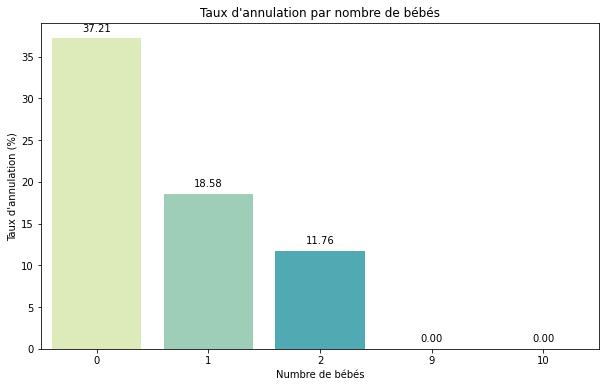

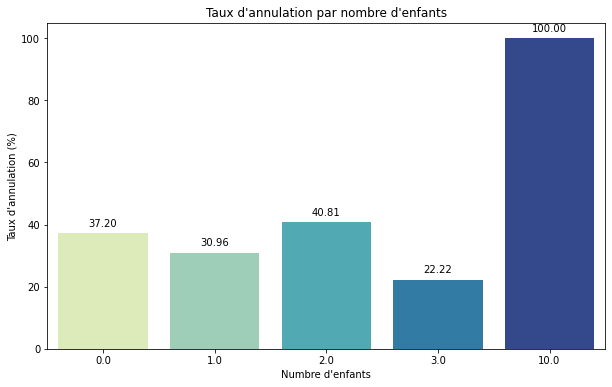

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculez le taux d'annulation pour chaque valeur dans 'babies'
cancellation_rate_babies = hotel_data.groupby('babies')['is_canceled'].mean() * 100

# Créez un graphique à barres avec la palette de couleurs 'YlGnBu' et les étiquettes de données
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cancellation_rate_babies.index, y=cancellation_rate_babies, palette='YlGnBu')

plt.ylabel("Taux d'annulation (%)")
plt.xlabel('Numbre de bébés')
plt.title("Taux d'annulation par nombre de bébés")
plt.xticks(rotation=0)

# Ajoutez des étiquettes de données aux barres 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

# Calculez le taux d'annulation pour chaque valeur dans 'children'
cancellation_rate_children = hotel_data.groupby('children')['is_canceled'].mean() * 100

# Créez un graphique à barres avec la palette de couleurs 'YlGnBu' et les étiquettes de données
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cancellation_rate_children.index, y=cancellation_rate_children, palette='YlGnBu')

plt.ylabel("Taux d'annulation (%)")
plt.xlabel("Numbre d'enfants")
plt.title("Taux d'annulation par nombre d'enfants")
plt.xticks(rotation=0)

# Ajoutez des étiquettes de données aux barres 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

La présence de bébés dans les réservations n'influence pas de manière significative les annulations, le taux d'annulation le plus élevé étant observé pour les réservations sans bébé. Cependant, une tendance notable se dessine pour les réservations avec deux enfants, où le taux d'annulation est d'environ 40 %. Il est essentiel de reconnaître que même s'il existe un taux d'annulation de 100 % pour les réservations avec dix enfants, ce point de données est peu fréquent et ne mérite pas une attention particulière.

# Taux d'annulation par type de chambre

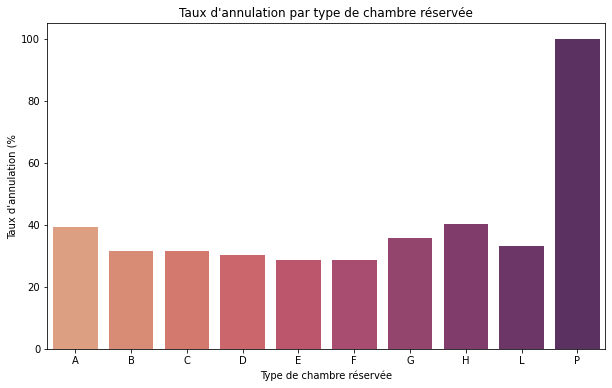

In [24]:
# Calculez le taux d'annulation pour chaque type de chambre
cancellation_rate_by_room_type = hotel_data.groupby('reserved_room_type')['is_canceled'].mean() * 100

# Créez un graphique à barres avec la palette de couleurs
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rate_by_room_type.index, y=cancellation_rate_by_room_type.values, palette='flare')
plt.ylabel("Taux d'annulation (%")
plt.xlabel('Type de chambre réservée')
plt.title("Taux d'annulation par type de chambre réservée")
plt.xticks(rotation=0)
plt.show()


Nous observons que les chambres du type A, G & H ont un taux d'annulation environnant les 40%. Il est essentiel de reconnaître que même s'il existe un taux d'annulation de 100 % pour les chambres du type P, ce point de données est peu fréquent sûrement une erreur et ne mérite pas une attention particulière.

# Taux d'annulation par type d'hôtels

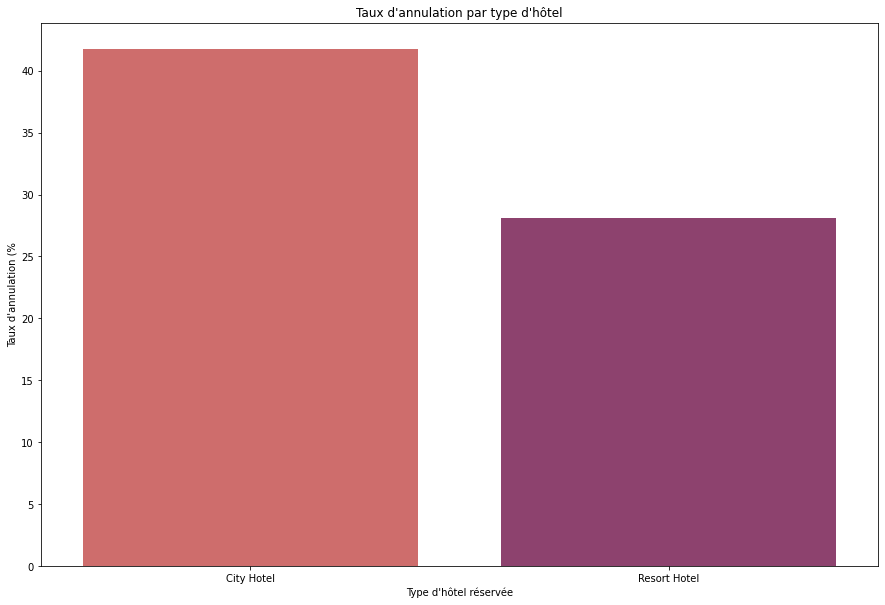

In [25]:
# Calculez le taux d'annulation pour chaque type d'hôtels
Hotel = hotel_data.groupby('hotel')['is_canceled'].mean() * 100

# Créez un graphique à barres avec la palette de couleurs
plt.figure(figsize=(15, 10))
sns.barplot(x=Hotel.index, y=Hotel.values, palette='flare')
plt.ylabel("Taux d'annulation (%")
plt.xlabel("Type d'hôtel réservée")
plt.title("Taux d'annulation par type d'hôtel")
plt.xticks(rotation=0)
plt.show()

# La Durée de séjour

La durée moyenne d'un séjour est de : 3.426700664655982


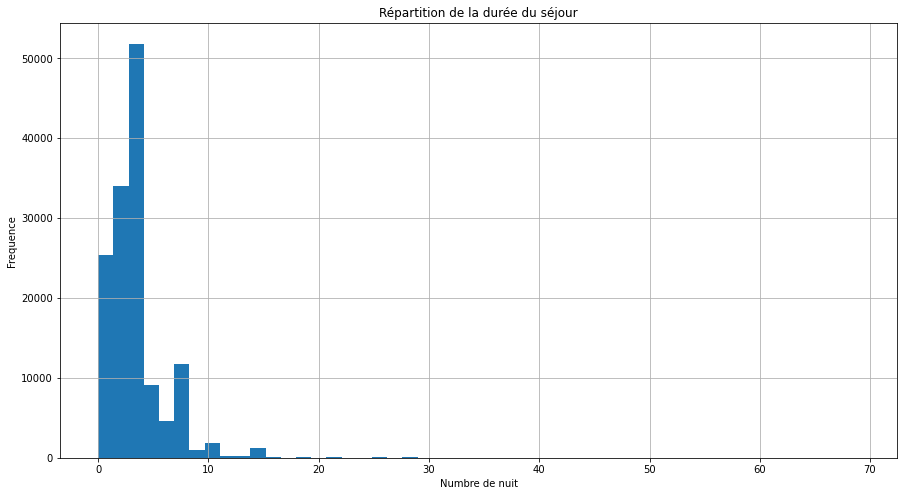

In [26]:
hotel_data['total_stay'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
plt.figure(figsize=(15, 8))
hotel_data['total_stay'].hist(bins=50)
plt.title('Répartition de la durée du séjour')
plt.xlabel('Numbre de nuit')
plt.ylabel('Frequence')

print("La durée moyenne d'un séjour est de : {}".format(hotel_data['total_stay'].mean()))

La durée de séjour ce situe généralement en 0 & 10 jours. 
La durée moyenne d'un séjour est de : 3.4 jours

# Taux d'annulation par Semaine

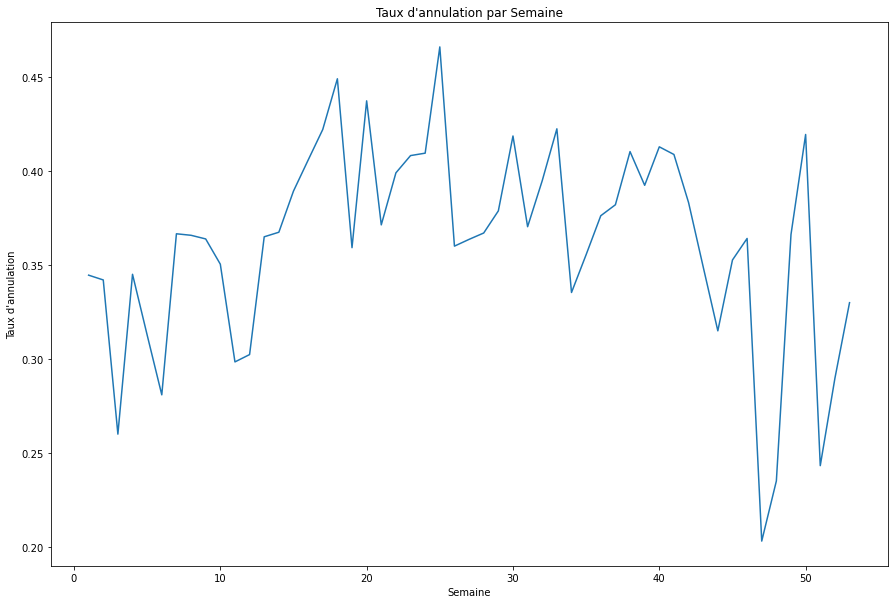

In [29]:
# Calculate the cancellation rate
cancellation_rate = hotel_data['is_canceled'].mean()

# Group the data by week
donnees = hotel_data.groupby('arrival_date_week_number')['is_canceled'].mean()

# Plot the data
plt.figure(figsize=(15, 10))
plt.plot(donnees)
plt.xlabel('Semaine')
plt.title("Taux d'annulation par Semaine")
plt.ylabel('Taux d\'annulation')
plt.show()

Nous observos que entre la semaine du 20 & 30 le taux d'annulation est le plus élevé.

# Taux d'annulation par type de repas

In [30]:
hotel_data['meal'].value_counts()

meal
BB           109508
HB            18402
SC            11067
Undefined      1372
FB             1228
Name: count, dtype: int64

BB = BB (Bed and Breakfast) [le petit-déjeuner est inclus dans le prix de l'hôtel]

HB = HB (Half Board) [Le prix comprend le petit-déjeuner et la demi-pension]

SC = SC (Self Catering) [Self-restauration. Les repas ne sont pas inclus dans le prix, mais les clients ont généralement accès à la cuisine ou à la kitchenette où ils peuvent préparer leurs propres repas.]

FB = FB (Full Board) [Petit déjeuner, déjeuner et dîner inclus.]

array([<AxesSubplot:ylabel='count'>], dtype=object)

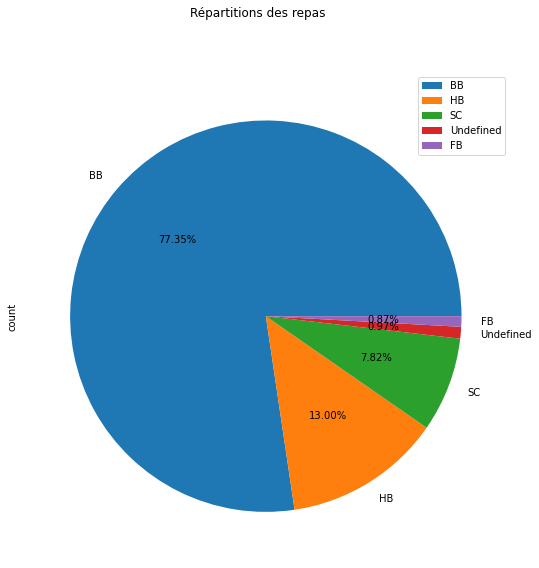

In [31]:
hotel_data.groupby('meal')['is_canceled'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Répartitions des repas',figsize=(9,9))

Nous observons que la repartions des repas est inégale dans le jeu de données. Plus de la moitié des visiteurs choisissent la formule Bed and Breakfast (BB) dont le petit-déjeuner est inclus dans le prix de l'hôtel. Par conséquent, nous ne pouvons déterminer si cela impact le taux d'annulation. 

# Taux d'annulation par Pays

In [32]:
hotel_data['country'] = hotel_data['country'].replace('CN', 'CAN')

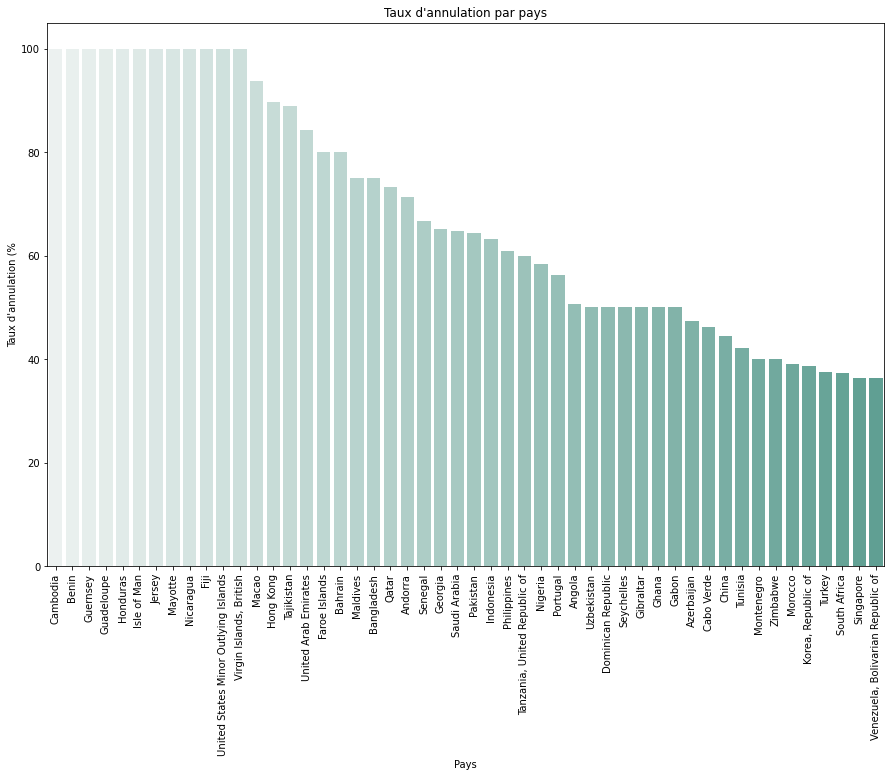

In [33]:
import pycountry
# Calculez le taux d'annulation par pays
Country = hotel_data.groupby("country")["is_canceled"].mean() * 100
#Triez par ordre croissant les pays
Country = Country.sort_values(ascending=False)

#Filtrer le pourcentage du taux d'annulation
Country = Country[:50]

#Récuperer le nom du pays entier 
abbreviation_to_name = {country.alpha_3: country.name for country in pycountry.countries}
Country.index = Country.index.map(abbreviation_to_name)

# Créez un graphique à barres avec la palette de couleurs
plt.figure(figsize=(15, 10))
sns.barplot(x=Country.index, y=Country.values, palette='light:#5A9')
plt.ylabel("Taux d'annulation (%")
plt.xlabel('Pays')
plt.title("Taux d'annulation par pays")
plt.xticks(rotation=90)
plt.show()

In [34]:
print("Les pays avec le plus gros taux d'annulation :", Country[11:50])

Les pays avec le plus gros taux d'annulation : country
Virgin Islands, British              100.000000
Macao                                 93.750000
Hong Kong                             89.655172
Tajikistan                            88.888889
United Arab Emirates                  84.313725
Faroe Islands                         80.000000
Bahrain                               80.000000
Maldives                              75.000000
Bangladesh                            75.000000
Qatar                                 73.333333
Andorra                               71.428571
Senegal                               66.666667
Georgia                               65.217391
Saudi Arabia                          64.705882
Pakistan                              64.285714
Indonesia                             63.157895
Philippines                           60.975610
Tanzania, United Republic of          60.000000
Nigeria                               58.333333
Portugal                         

# Le mois d'arriver avec le plus gros taux d'annulation

<AxesSubplot:xlabel='arrival_date_month'>

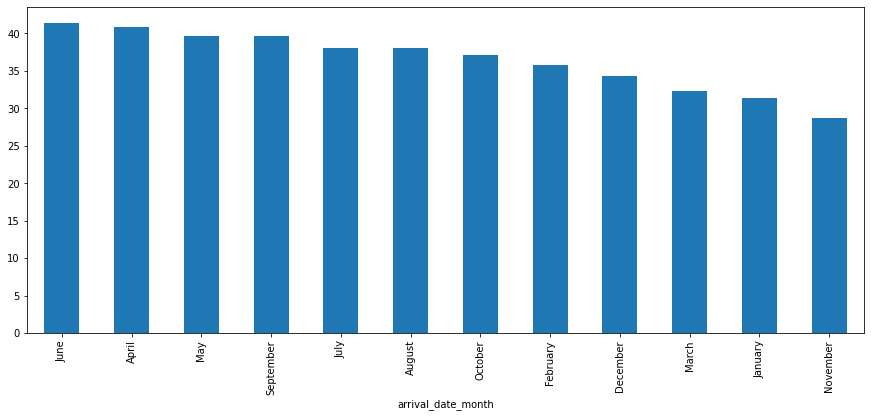

In [35]:
Arriver_Date = hotel_data.groupby("arrival_date_month")["is_canceled"].mean() * 100
Arriver_Date.sort_values(ascending=False).plot(kind='bar', figsize=(15, 6))

Les hôtels doivent s'attendre à avoir un gros taux d'annulation au mois de Juin, a contraint le mois de Novembre et mois le moix avec le plus faible taux d'annulation

# Modélisation prédictive

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [37]:
#Modele
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import VotingClassifier

#GridSearch
import itertools
from matplotlib import rc,rcParams

#Métric
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn import datasets, metrics, model_selection, svm
import scikitplot as skplt

In [38]:
# Sélectionnez les colonnes d'intérêt
selected_columns = ['lead_time', 'arrival_date_month', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'is_canceled']

# Créer un sous-ensemble de données avec les colonnes sélectionnées
subset_data = hotel_data[selected_columns]
subset_data

,lead_time,arrival_date_month,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,is_canceled
0,85,July,PRT,Online TA,TA/TO,A,No Deposit,Transient,1
1,75,July,PRT,Offline TA/TO,TA/TO,D,No Deposit,Transient,1
2,23,July,PRT,Online TA,TA/TO,E,No Deposit,Transient,1
3,60,July,PRT,Online TA,TA/TO,E,No Deposit,Transient,1
4,96,July,PRT,Direct,Direct,E,No Deposit,Transient,1
...,...,...,...,...,...,...,...,...,...
141942,1,February,AUT,Aviation,Corporate,A,No Deposit,Transient,1
141943,31,July,USA,Direct,Direct,A,No Deposit,Transient,1
141944,25,May,FRA,Corporate,Corporate,E,No Deposit,Transient,1
141945,6,July,PRT,Corporate,Corporate,A,No Deposit,Transient,1


In [39]:
# Encoder les variables catégorielles
label_encoder = LabelEncoder()
categorical_columns = ['arrival_date_month', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
for col in categorical_columns:
    subset_data[col] = label_encoder.fit_transform(subset_data[col])
    

<ipython-input-39-4b91e37af93d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data[col] = label_encoder.fit_transform(subset_data[col])


In [40]:
# Diviser le données en fonctionnalités (X) et la variable cible (y)
X = subset_data.drop(columns='is_canceled')
y = subset_data['is_canceled']

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Initialize and fit the Random Forest model
Rd = RandomForestClassifier(n_estimators=100, random_state=42)
Rd.fit(X_train, y_train)

# Make predictions
Rd_pred = Rd.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, Rd_pred))
print("Accuracy:", accuracy_score(y_test, Rd_pred))
RF = accuracy_score(y_test, Rd_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     17704
           1       0.81      0.76      0.78     10612

    accuracy                           0.84     28316
   macro avg       0.83      0.83      0.83     28316
weighted avg       0.84      0.84      0.84     28316

Accuracy: 0.8423506144935725


In [42]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)

knn_model_pred = knn_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, knn_model_pred))
print("Accuracy:", accuracy_score(y_test, knn_model_pred))
KNC = accuracy_score(y_test, knn_model_pred)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     17704
           1       0.77      0.70      0.74     10612

    accuracy                           0.81     28316
   macro avg       0.80      0.79      0.80     28316
weighted avg       0.81      0.81      0.81     28316

Accuracy: 0.8119790930922447


In [43]:
LR = DecisionTreeClassifier()
LR_model = LR.fit(X_train,y_train)

LR_model_pred = LR_model.predict(X_test)
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, LR_model_pred))
print("Accuracy:", accuracy_score(y_test, LR_model_pred))
DC = accuracy_score(y_test, LR_model_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     17704
           1       0.80      0.75      0.77     10612

    accuracy                           0.83     28316
   macro avg       0.83      0.82      0.82     28316
weighted avg       0.83      0.83      0.83     28316

Accuracy: 0.8348636813109196


In [44]:
GBR = GradientBoostingClassifier()
GBR_model = GBR.fit(X_train,y_train)
GBR_pred = GBR_model.predict(X_test)
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, GBR_pred))
print("Accuracy:", accuracy_score(y_test, GBR_pred))
GBC = accuracy_score(y_test, GBR_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     17704
           1       0.83      0.57      0.68     10612

    accuracy                           0.80     28316
   macro avg       0.81      0.75      0.76     28316
weighted avg       0.80      0.80      0.79     28316

Accuracy: 0.7952394405989547


In [45]:
XGB = XGBClassifier()
XGB_model = XGB.fit(X_train,y_train)
XGB_pred = XGB_model.predict(X_test)
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, XGB_pred))
print("Accuracy:", accuracy_score(y_test, XGB_pred))
XGBC = accuracy_score(y_test, XGB_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     17704
           1       0.83      0.67      0.74     10612

    accuracy                           0.82     28316
   macro avg       0.82      0.79      0.80     28316
weighted avg       0.82      0.82      0.82     28316

Accuracy: 0.8235626500918208


In [46]:
model = VotingClassifier(estimators=[('RandomForestClassifier', Rd), ('KNeighborsClassifier', knn), ('DecisionTreeClassifier', LR), ('GradientBoostingClassifier', GBR),('XGBClassifier',XGB)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8422093516033338

In [47]:
model_data =[['RandomForestClassifier', RF],
             ['KNeighborsClassifier', KNC],
             ['DecisionTreeClassifier', DC],
             ['GradientBoostingClassifier', GBC],
             ['XGBClassifier',XGBC]]

indexes = [1,2,3,4,5]
columns_name = ['MODEL', 'Accuracy']
ife = pd.DataFrame(data = model_data,index = indexes, columns = columns_name )
print(ife)

                        MODEL  Accuracy
1      RandomForestClassifier  0.842351
2        KNeighborsClassifier  0.811979
3      DecisionTreeClassifier  0.834864
4  GradientBoostingClassifier  0.795239
5               XGBClassifier  0.823563


Random Forest Classifier a atteint une précision d'environ 84,29 %, ce que je considère comme une bonne chose dans le contexte de l'analyse.



In [48]:
# On récupère les importances pour chaque variable
feature_importance = Rd.feature_importances_
feature_names = X.columns

In [49]:
# On récupère les importances dans un DataFrame
features_imp = pd.DataFrame(
    data=np.asarray([X.columns, Rd.feature_importances_]).transpose(),
    columns=['Variable', 'Importance']
)
# On tri les importances dans l'ordre décroissant
features_imp = features_imp.sort_values('Importance', ascending=False)
features_imp

,Variable,Importance
0,lead_time,0.40308
2,country,0.19669
6,deposit_type,0.167233
1,arrival_date_month,0.078208
3,market_segment,0.075396
7,customer_type,0.031847
5,reserved_room_type,0.031723
4,distribution_channel,0.015823


<ipython-input-50-92fd9508f22b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0%}'.format(x) for x in np.linspace(0, 0.36, 10)], fontsize=18)


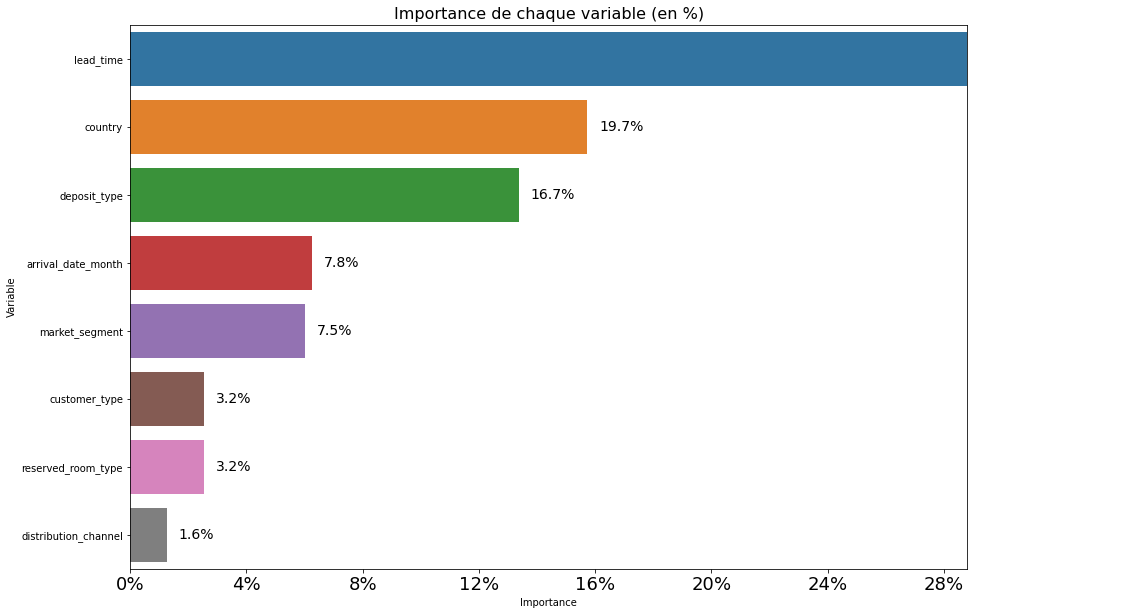

In [50]:
plt.figure(figsize=(15, 10))

graph = sns.barplot(x='Importance', y='Variable', data=features_imp.iloc[:10])
for p in graph.patches:
    graph.annotate(
        '{:2.1f}%'.format(p.get_width() * 100), (p.get_width() + 0.005, p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        color= 'black',
        fontsize=14
    )

plt.gca().set_xlim(0, 0.36)
plt.gca().set_xticklabels(['{:,.0%}'.format(x) for x in np.linspace(0, 0.36, 10)], fontsize=18)
plt.title("Importance de chaque variable (en %)", fontsize=16)
plt.show()

# Convertir en %

In [51]:
Imp = features_imp
#Convertir la colonne importance en pourcentage
Imp['Importance'] = Imp['Importance']*100
#Convertir la colonne Importance en Float
Imp['Importance'] = Imp['Importance'].astype(float, errors="raise")
#Arrondir la colonne Importance a 2 chiffres après la virgule
Imp['Importance'] = round(Imp['Importance'],2)
#Réindexer le dataframe
Imp = Imp.reset_index()
#Supprimer la colonne Index
Imp = Imp.drop('index', axis=1)
Imp

,Variable,Importance
0,lead_time,40.31
1,country,19.67
2,deposit_type,16.72
3,arrival_date_month,7.82
4,market_segment,7.54
5,customer_type,3.18
6,reserved_room_type,3.17
7,distribution_channel,1.58


# Analyse d'importances pour chaque variable

lead_time (Délai) 40.3 % : cette fonctionnalité revêt la plus haute importance dans la prévision des annulations. Cela suggère que le temps écoulé entre la réservation et la date réelle du séjour joue un rôle important. Les clients qui réservent longtemps à l’avance peuvent avoir des comportements d’annulation différents de ceux qui réservent à la dernière minute.

Country (Pays) 19.7% : L'origine des invités, représentée par la variable pays, est le deuxième facteur le plus influent. Différents pays peuvent présenter des modèles de réservation et d’annulation distincts.

deposit_type (Type de dépôt) 16.7 % : Le type de dépôt effectué lors de la réservation est également un indicateur important.

arrival_date_month (Mois de la date d'arrivée) 7.8 % : Le mois de l'année où les invités arrivent est également une caractéristique essentielle. Les variations saisonnières et les événements peuvent avoir un impact sur les taux d'annulation.

market_segment (Segment de marché) 7.5 % : Le segment de marché d'où provient la réservation revêt une importance considérable. Différents segments (par exemple, les voyageurs d'affaires, les groupes et les voyageurs individuels) peuvent avoir des tendances d'annulation différentes.

customer_type (Type de client) 3.2% : Le type de client (par exemple, passager, groupe, etc.) est une fonctionnalité précieuse. Différents segments de clientèle peuvent présenter des comportements d'annulation différents.

reserved_room_type (Type de chambre réservée) 3.2% : Le type de chambre réservée est un facteur clé. Les clients réservant des types de chambres spécifiques peuvent être plus ou moins susceptibles d’annuler.

distribution_channel (Type de dépôt) 1.6% : Le type de dépôt effectué lors de la réservation est également un indicateur important.

In [52]:
for i, row in Imp.iterrows():
    print(f"La variable {row['Variable']} a une importance de {row['Importance']}%")


La variable lead_time a une importance de 40.31%
La variable country a une importance de 19.67%
La variable deposit_type a une importance de 16.72%
La variable arrival_date_month a une importance de 7.82%
La variable market_segment a une importance de 7.54%
La variable customer_type a une importance de 3.18%
La variable reserved_room_type a une importance de 3.17%
La variable distribution_channel a une importance de 1.58%


print(f"La variable {Imp.loc[0, 'Variable']}. est de {Imp.loc[0, 'Importance']} %, cette fonctionnalité revêt la plus haute importance dans la prévision des annulations. Cela suggère que le temps écoulé entre la réservation et la date réelle du séjour joue un rôle important. Les clients qui réservent longtemps à l’avance peuvent avoir des comportements d’annulation différents de ceux qui réservent à la dernière minute. ")